## Problem Statement - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1. Loading the Data

In [2]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Data Cleaning 

In [5]:
# Replacing string with NaN values
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [6]:
# Checking missing values 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Droping null values
df.dropna(inplace=True)

In [8]:
# Converting object to float
df['TotalCharges']=df['TotalCharges'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
# Droping customerID column
df.drop('customerID',axis=1,inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7032, 20)

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# Checking missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3. Splitting the data into train and test

In [15]:
# Divide the dataset into train and test. 
# Target: Churn (output)
from sklearn.model_selection import train_test_split

In [16]:
# train_test_split => shuffles the data first, then it will split the data into train and test. 
X_train, X_test,Y_train, Y_test = train_test_split(df.drop('Churn', axis=1),\
                                                   df['Churn'], test_size=0.25,random_state=65)

In [17]:
print(X_train.shape, Y_train.shape)

(5274, 19) (5274,)


In [18]:
print(X_test.shape, Y_test.shape)

(1758, 19) (1758,)


### 4. Data Preparation on train data :

>### Applying `OneHotEncoding` For Categorical Variables

In [19]:
# scikit-learn or sklearn
from sklearn.preprocessing import OneHotEncoder

In [20]:
# Filtering all categorical type data
X_train_obj = X_train.select_dtypes(['object'])

In [21]:
X_train_obj.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5847,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic)
5806,Female,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check
2504,Male,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
3655,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic)
2388,Female,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [22]:
X_train_obj.shape

(5274, 15)

In [23]:
oe = OneHotEncoder(drop='first', sparse=False)

In [24]:
####
"""
Very Very Very Imp Note:
On training data apply fit/fit_transform only. 
On testing data apply transform method only.
fit => Learn from the Data. 
transform => Apply the learning on the data. 
fit_transform => Learn from the data, Apply on the Data. 
"""

'\nVery Very Very Imp Note:\nOn training data apply fit/fit_transform only. \nOn testing data apply transform method only.\nfit => Learn from the Data. \ntransform => Apply the learning on the data. \nfit_transform => Learn from the data, Apply on the Data. \n'

In [25]:
# It will remove column names, and index also removed.
X_train_obj_oe = pd.DataFrame(oe.fit_transform(X_train_obj), index=X_train_obj.index,\
            columns=oe.get_feature_names_out(X_train_obj.columns))

In [26]:
X_train_obj_oe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5847,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5806,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2504,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3655,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
X_train_obj_oe.shape

(5274, 26)

>### Applying `Standardization` For Numerical Variables

In [28]:
# Filtering all Numerical data type
X_train_numeric = X_train.select_dtypes(['int','float'])
X_train_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5847,0,62,94.00,5757.20
5806,0,2,19.60,35.85
2504,0,2,75.70,189.20
3655,0,32,19.40,641.15
2388,0,1,55.45,55.45


In [29]:
X_train_numeric.shape

(5274, 4)

In [30]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_num_df = pd.DataFrame(sc.fit_transform(X_train_numeric), index=X_train_numeric.index,\
             columns=X_train_numeric.columns)

X_train_num_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5847,-0.43956,1.203782,0.975650,1.544919
5806,-0.43956,-1.241414,-1.498684,-0.992122
2504,-0.43956,-1.241414,0.367044,-0.924121
3655,-0.43956,-0.018816,-1.505336,-0.723711
2388,-0.43956,-1.282167,-0.306414,-0.983431


In [31]:
X_train_num_df.shape

(5274, 4)

>### Processing trained Categorical and Numerical Variables

In [32]:
#X_train_obj_oe, X_train_num_df
X_train_processed = X_train_num_df.merge(X_train_obj_oe, left_index=True, right_index=True)
X_train_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5847,-0.43956,1.203782,0.975650,1.544919,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
5806,-0.43956,-1.241414,-1.498684,-0.992122,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2504,-0.43956,-1.241414,0.367044,-0.924121,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3655,-0.43956,-0.018816,-1.505336,-0.723711,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2388,-0.43956,-1.282167,-0.306414,-0.983431,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
X_train_processed.shape

(5274, 30)

### 5. Data preparation on test data:

>### For Categorical Variables 

In [34]:
# Filtering all categorical type data
X_test_obj = X_test.select_dtypes(['object'])

# It will remove column names, and index also removed.
X_test_obj_oe = pd.DataFrame(oe.fit_transform(X_test_obj), index=X_test_obj.index,\
            columns=oe.get_feature_names_out(X_test_obj.columns))

X_test_obj_oe

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5305,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
405,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5866,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4589,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
47,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1514,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2419,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
225,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


>### For Numerical Variables

In [35]:
# Filtering all Numerical type data
X_test_num = X_test.select_dtypes(['int','float'])

X_test_num_df = pd.DataFrame(sc.transform(X_test_num), index=X_test_num.index,\
             columns=X_test_num.columns)

X_test_num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5305,-0.43956,0.429470,0.470141,0.526396
405,-0.43956,1.611315,-1.492033,-0.356725
5866,-0.43956,-1.200661,-1.497022,-0.977710
4589,-0.43956,-0.915388,-1.480393,-0.910109
47,-0.43956,-1.241414,0.531667,-0.944098
...,...,...,...,...
2710,-0.43956,-0.344842,-1.472079,-0.793929
1514,-0.43956,1.244536,-1.502010,-0.469202
2419,-0.43956,-0.874634,-0.361289,-0.719100
225,-0.43956,-0.344842,-0.467712,-0.436543


>### Processing Tested Categorical and Numerical Variables 

In [36]:
#X_test_obj_oe, X_test_num_df
X_test_processed = X_test_num_df.merge(X_test_obj_oe, left_index=True, right_index=True)
X_test_processed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5305,-0.43956,0.429470,0.470141,0.526396,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
405,-0.43956,1.611315,-1.492033,-0.356725,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5866,-0.43956,-1.200661,-1.497022,-0.977710,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4589,-0.43956,-0.915388,-1.480393,-0.910109,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
47,-0.43956,-1.241414,0.531667,-0.944098,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
X_test_processed.shape

(1758, 30)

### 6. Model training phase

>### a) Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_processed, Y_train)
y_pred_lr = lr.predict(X_test_processed)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred_lr))

0.8122866894197952


In [40]:
# Create a DataFrame with the predicted values and true values
df1 = pd.DataFrame({'y_pred': y_pred_lr, 'Churn': Y_test})
df1

,y_pred,Churn
5305,No,No
405,No,No
5866,No,No
4589,No,No
47,Yes,Yes
...,...,...
2710,No,No
1514,No,No
2419,No,No
225,No,No


In [41]:
# Create a Data Frame with Real and Predicted
pd.crosstab(Y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
Actual,,,
No,1154,110,1264
Yes,220,274,494
All,1374,384,1758


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

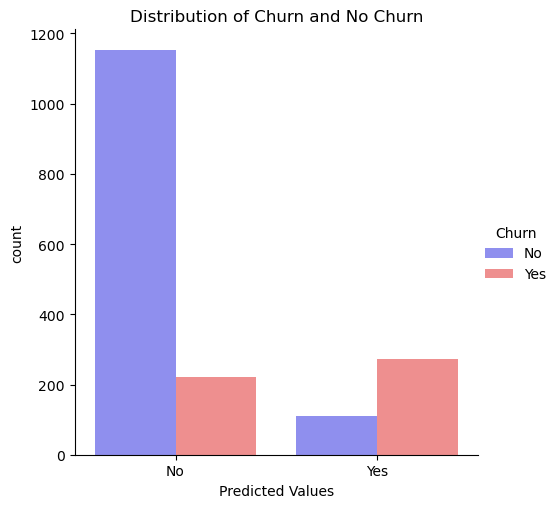

In [44]:
# Create a categorical plot using catplot()
sns.catplot(data=df1, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()

>* From the above plot we can observe that Churn has maximum No values. And the frequency of predicted No churn but real Yes churn is around 220. And the frequency of predicted No churn and real is also No churn is around 1154.

>### b) KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier()
knr.fit(X_train_processed, Y_train)
y_pred_knr= knr.predict(X_test_processed)
print(accuracy_score(Y_test,y_pred_knr))

0.757679180887372


In [46]:
# Create a DataFrame with the predicted values and true values
df2 = pd.DataFrame({'y_pred': y_pred_knr, 'Churn': Y_test})
df2

,y_pred,Churn
5305,No,No
405,No,No
5866,No,No
4589,No,No
47,Yes,Yes
...,...,...
2710,No,No
1514,No,No
2419,No,No
225,No,No


In [47]:
# Create a Data Frame with Real and Predicted
pd.crosstab(Y_test, y_pred_knr, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
Actual,,,
No,1074,190,1264
Yes,236,258,494
All,1310,448,1758


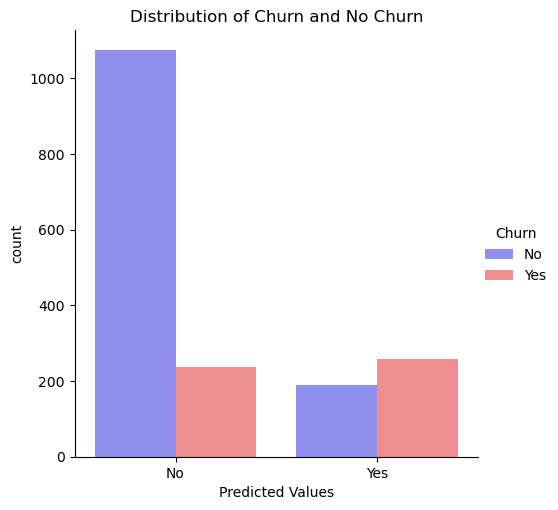

In [48]:
# Create a categorical plot using catplot()
sns.catplot(data=df2, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()

>* From the above plot we can observe that Churn has maximum No values. And the frequency of predicted No churn but real Yes churn is around 236. And the frequency of predicted No churn and real is also No churn is around 1074.

>### c) Support Vector Machines

In [49]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_processed, Y_train)
y_pred_svm = svm.predict(X_test_processed)
print(accuracy_score(Y_test,y_pred_svm))

0.7952218430034129


In [50]:
# Create a DataFrame with the predicted values and true values
df3 = pd.DataFrame({'y_pred': y_pred_svm, 'Churn': Y_test})
df3

,y_pred,Churn
5305,No,No
405,No,No
5866,No,No
4589,No,No
47,Yes,Yes
...,...,...
2710,No,No
1514,No,No
2419,No,No
225,No,No


In [51]:
# Create a Data Frame with Real and Predicted
pd.crosstab(Y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
Actual,,,
No,1174,90,1264
Yes,270,224,494
All,1444,314,1758


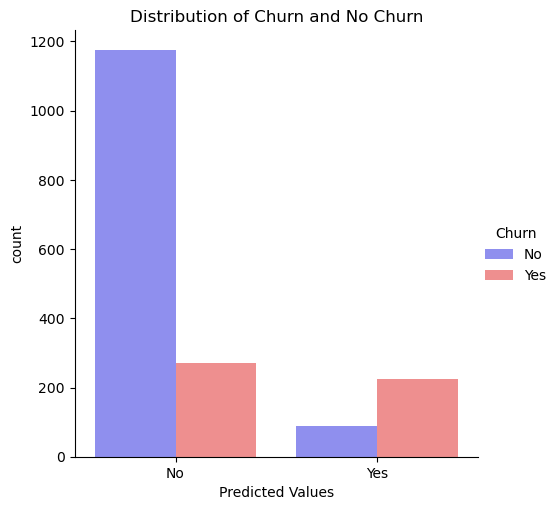

In [52]:
# Create a categorical plot using catplot()
sns.catplot(data=df3, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()

>* From the above plot we can observe that Churn has maximum No values. And the frequency of predicted No churn but real Yes churn is around 270. And the frequency of predicted No churn and real is also No churn is around 1174.

>### d) Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_processed, Y_train)
y_pred_dt = dt.predict(X_test_processed)
print(accuracy_score(Y_test,y_pred_dt))

0.7252559726962458


In [54]:
# Create a DataFrame with the predicted values and true values
df4 = pd.DataFrame({'y_pred': y_pred_dt, 'Churn': Y_test})
df4

,y_pred,Churn
5305,No,No
405,No,No
5866,No,No
4589,No,No
47,Yes,Yes
...,...,...
2710,No,No
1514,No,No
2419,No,No
225,No,No


In [55]:
# Create a Data Frame with Real and Predicted
pd.crosstab(Y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
Actual,,,
No,1032,232,1264
Yes,251,243,494
All,1283,475,1758


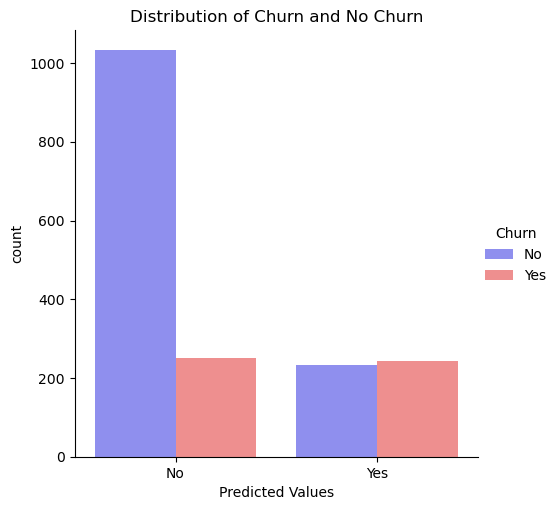

In [56]:
# Create a categorical plot using catplot()
sns.catplot(data=df4, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()

>* From the above plot we can observe that Churn has maximum No values. And the frequency of predicted No churn but real Yes churn is around 243. And the frequency of predicted No churn and real is also No churn is around 1034.

>### e) Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_processed, Y_train)
y_pred_rf = rf.predict(X_test_processed)
print(accuracy_score(Y_test,y_pred_rf))

0.7815699658703071


In [58]:
# Create a DataFrame with the predicted values and true values
df5 = pd.DataFrame({'y_pred': y_pred_rf, 'Churn': Y_test})
df5

,y_pred,Churn
5305,No,No
405,No,No
5866,No,No
4589,No,No
47,Yes,Yes
...,...,...
2710,No,No
1514,No,No
2419,No,No
225,No,No


In [59]:
# Create a Data Frame with Real and Predicted
pd.crosstab(Y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,No,Yes,All
Actual,,,
No,1152,112,1264
Yes,272,222,494
All,1424,334,1758


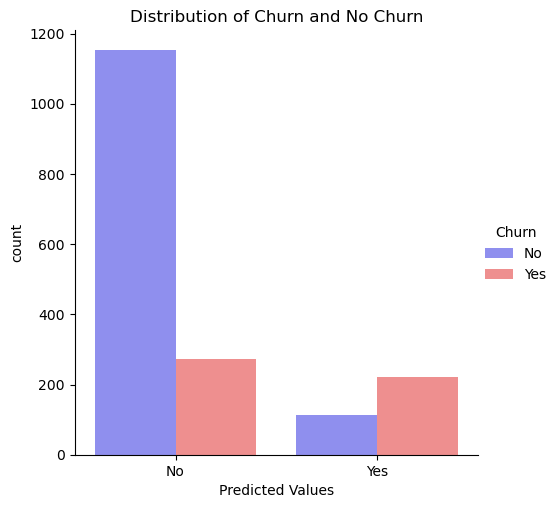

In [60]:
# Create a categorical plot using catplot()
sns.catplot(data=df5, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()

>* From the above plot we can observe that Churn has maximum No values. And the frequency of predicted No churn but real Yes churn is around 270. And the frequency of predicted No churn and real is also No churn is around 1152.

>### Relation between Accuracy

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
Accuracy = [0.8122, 0.7576, 0.7952, 0.7252, 0.7804]
Classifiers = ['lr', 'knn', 'svm', 'dt', 'rf']

In [63]:
# Creare a DataFrame of all accuacies
acc=pd.DataFrame(list(zip(Classifiers,Accuracy)),columns=['Classifiers','accuracy'])
acc

,Classifiers,accuracy
0,lr,0.8122
1,knn,0.7576
2,svm,0.7952
3,dt,0.7252
4,rf,0.7804


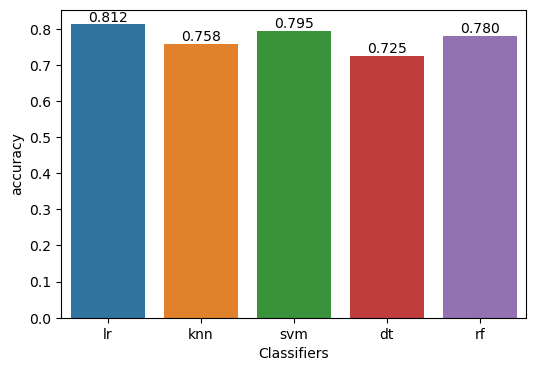

In [64]:
plt.figure(figsize= (6,4))
sns.barplot(x = acc['Classifiers'], y=acc['accuracy'])
for i,v in enumerate(acc['accuracy']):
    plt.text(i,v,f"{v:.3f}",ha="center",va="bottom")
plt.show()

>### Observation:
From the above barplot we can say that Logistic Regression Algorithm shows high accuracy in predicting the output for test data

## Exploratory Data Analysis

In [65]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [67]:
df.describe ()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

In [68]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### histplot

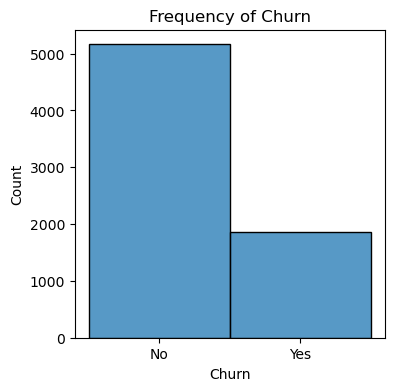

In [69]:
# Create a categorical plot using histplot()
plt.figure(figsize= (4,4))
sns.histplot(x=df['Churn'])
# Set the title of the plot
plt.title('Frequency of Churn')
# Display the plot
plt.show()

>### Observation:
From the above histplot more than 5163 customers not churned and around 1869 customers has churned.

### pie plot

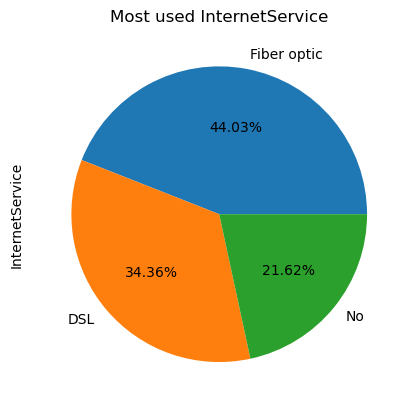

In [70]:
# Create a categorical plot using pieplot()
df['InternetService'].value_counts().plot.pie(autopct="%.2f%%")
# Set the title 
plt.title('Most used InternetService')
# Displat the plot
plt.show()

>### Observation:
From the above pie plot we can observe that 44.03% of the customers are using Fiber optics which is highly used internet service whereas DSL is used by 34.36% customers, while 21.62% customers has no internet service.

In [71]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

### count plot

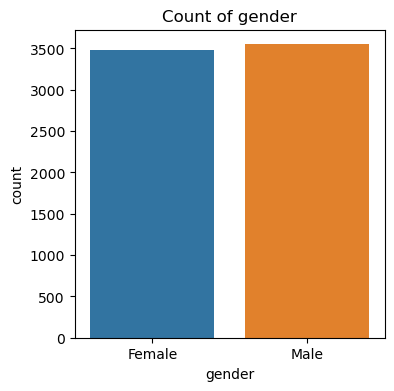

In [72]:
# Create a categorical plot using countplot()
plt.figure(figsize=(4,4))
sns.countplot(x=df['gender'],data=df)
# Set the tile
plt.title('Count of gender')
# Display the plot
plt.show()

>### Observation:
From the plot we observed that there are more male customers than that of female customers. Where the number of female customers are less than 3500, the number of male customers are above 3500.

### Bivariate Analysis

### bar plot

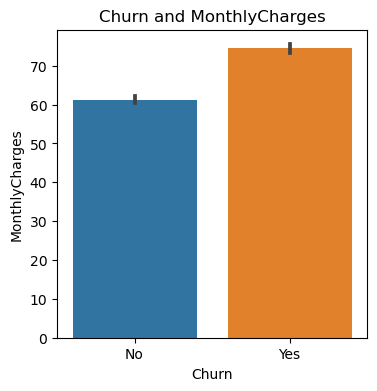

In [73]:
# Create a categorical-Numerical plot using barplot()
plt.figure(figsize=(4,4))
sns.barplot(x=df['Churn'], y=df['MonthlyCharges'],data=df)
# Set the tile
plt.title('Churn and MonthlyCharges')
# Display the plot
plt.show()

>### Observation:
From Data Exploration we got average MonthlyCharges are 64. But From the above barplot we observed that the customers who doesn't Churn has average MonthlyCharges, where as the customers who Churns has to pay more than average MonthlyCharges.

### cat plot

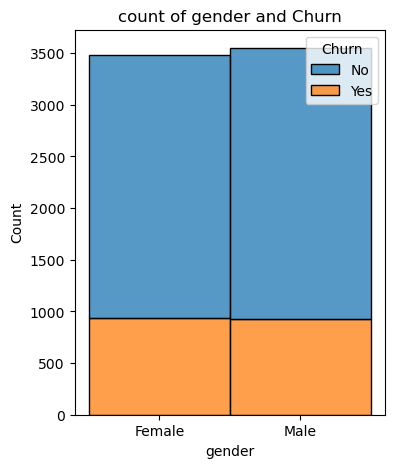

In [74]:
plt.figure(figsize=(4,5))
plot=sns.histplot(binwidth=0.5, x="gender", hue="Churn", data=df, stat="count", multiple='stack')
plt.title('count of gender and Churn')
plt.show()

>### Observation:
From the above catplot we observed that the count of male is high and the rate of churn is almost equal for both male and female. The count of non churned customers is high for Male.

### cat plot

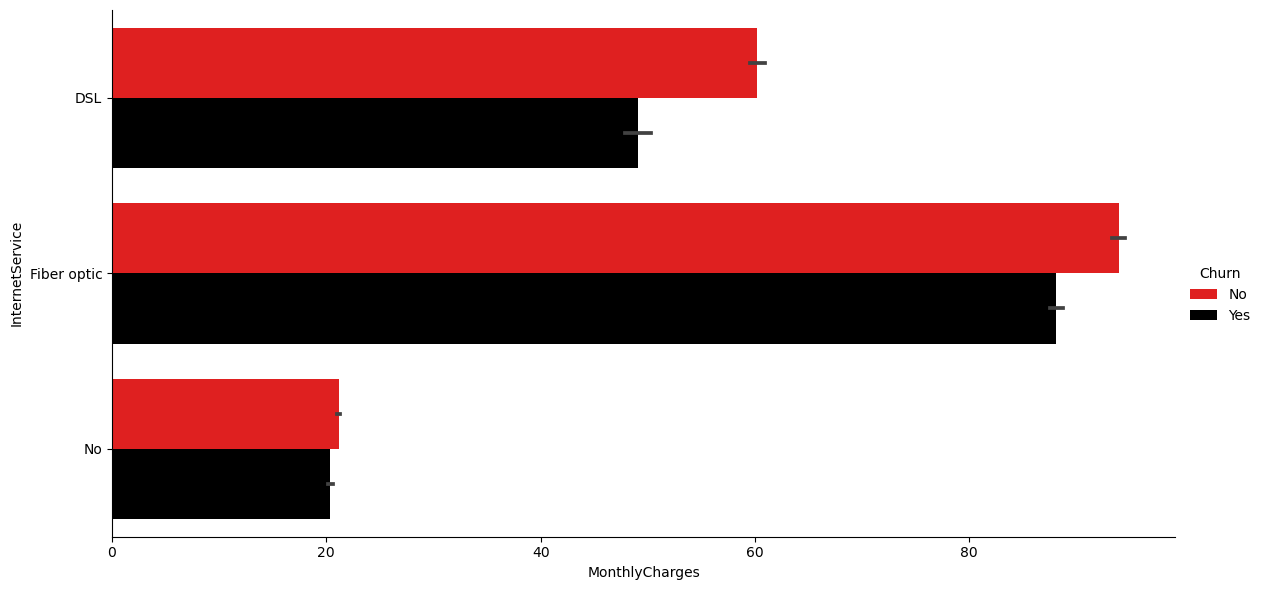

In [75]:
g = sns.catplot(data=df, x='MonthlyCharges', y='InternetService', kind='bar', hue='Churn',palette=['red','black'], legend=True, height=6, aspect=2)
plt.show()

>### Observation:
From the above catplot we observed that Fiber optic service has high MonthlyCharges. For the customers who use Fiber optic, the count of not churned customers is maximum.

### pair plot

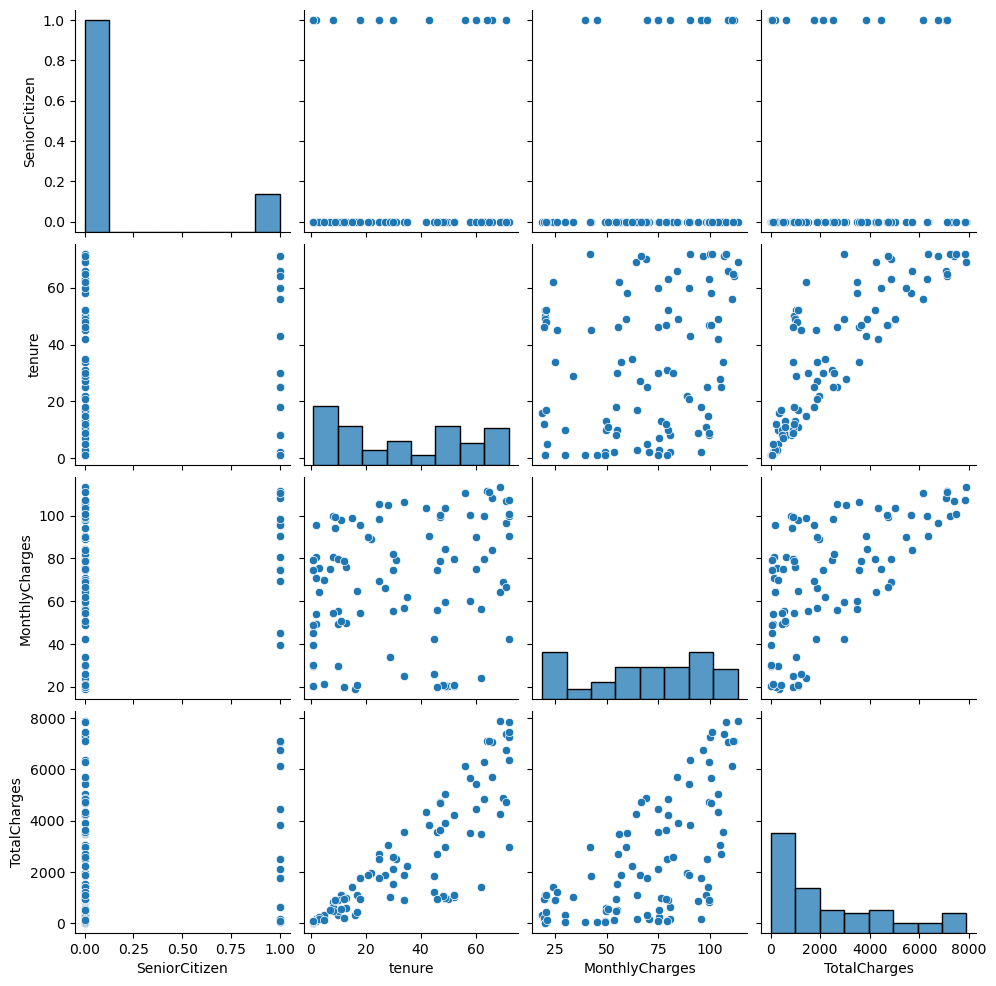

In [76]:
sns.pairplot(df.head(100))
plt.show()

>### Observation:
From the above pair plot we observed the both distribution of single variable and relation between two variable

### Scenario:

In [79]:
a=float(input('Enter the MonthlyCharges between 18 and 118:'))
b=input('Enter the InternetService(Fiber optic,DSL):')
c=input('Enter the gender of the customer:')

Enter the MonthlyCharges between 18 and 118:110
Enter the InternetService(Fiber optic,DSL):Fiber optic
Enter the gender of the customer:Male


In [80]:
df[(df['MonthlyCharges']>a)&(df['InternetService']==b)&(df['gender']==c)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
72,Male,1,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,7099.00,No
197,Male,0,No,No,59,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.35,6519.75,No
198,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.25,8041.65,No
257,Male,0,No,No,50,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),114.35,5791.10,No
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
6566,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.55,8152.30,No
6605,Male,1,No,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),110.90,7432.05,Yes
6785,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes


## Conclusion :

>* From the above Scenario we can conclude that the most of the customers will not Churn.
>* From the Model Building and Exploratory Data Analysis of the Churn Dataset we concluded that LogisticRegression classifier has high accuracy of predicting the output(Churn).
>* From Univariate and Bivariate analysis we can say that there are more Male customers than Female, and maximum customers used Fabric optic InternetService that has high MonthlyCharges who doesn't Churn. 